<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Financial Theory with Python
**&mdash;A Gentle Introduction**

Dr Yves J Hilpisch | The Python Quants | The AI Machine

http://tpq.io | http://aimachine.io | [@dyjh](http://twitter.com/dyjh)

<img src="https://hilpisch.com/finpy_cover.png" width=30% border=1px align=left>

## Chapter 05 &mdash; Static Economy

## Numerical Examples

In [1]:
import numpy as np
from numpy.random import default_rng
np.set_printoptions(precision=5, suppress=True)

In [2]:
rng = default_rng(100)

In [3]:
I = 1000

In [4]:
S = rng.normal(loc=100, scale=20, size=I)

In [5]:
S[:14]

array([ 76.84901, 105.79512, 115.61708, 110.87947,  80.77235, 121.42017,
       114.02911, 114.09947, 114.90125, 122.08694, 144.85945,  87.77014,
       100.94422, 135.08469])

In [6]:
S.mean()

100.88376804485935

In [7]:
P = rng.random(I)

In [8]:
P[:10]

array([0.34914, 0.33408, 0.41319, 0.06102, 0.6339 , 0.51285, 0.51177,
       0.92149, 0.72853, 0.58985])

In [9]:
P /= P.sum()

In [10]:
P.sum()

1.0

In [11]:
P[:10]

array([0.00072, 0.00069, 0.00085, 0.00013, 0.00131, 0.00106, 0.00106,
       0.0019 , 0.0015 , 0.00122])

In [12]:
np.dot(P, S)

100.71981640185018

## Financial Assets

In [13]:
M = np.array((
    (11, 25, 0,  0,  25),
    (11, 20, 30, 15, 25),
    (11, 10, 0,  20, 10),
    (11, 5,  30, 15, 0),
    (11, 0,  0,  0,  0)
))

In [14]:
M0 = np.array(5 * [10.])

In [15]:
M0

array([10., 10., 10., 10., 10.])

In [16]:
M.mean(axis=0)

array([11., 12., 12., 10., 12.])

In [17]:
mu = M.mean(axis=0) / M0 - 1

In [18]:
mu

array([0.1, 0.2, 0.2, 0. , 0.2])

In [19]:
(M / M0 - 1)

array([[ 0.1,  1.5, -1. , -1. ,  1.5],
       [ 0.1,  1. ,  2. ,  0.5,  1.5],
       [ 0.1,  0. , -1. ,  1. ,  0. ],
       [ 0.1, -0.5,  2. ,  0.5, -1. ],
       [ 0.1, -1. , -1. , -1. , -1. ]])

In [20]:
sigma = (M / M0 - 1).std(axis=0)

In [21]:
sigma

array([0.     , 0.92736, 1.46969, 0.83666, 1.1225 ])

## Contingent Claims

In [22]:
K = 15

In [23]:
M[:, 1]

array([25, 20, 10,  5,  0])

In [24]:
C1 = np.maximum(M[:, 1] - K, 0)

In [25]:
C1

array([10,  5,  0,  0,  0])

In [26]:
phi = np.linalg.solve(M, C1)

In [27]:
phi

array([-0.     ,  0.5    ,  0.01667, -0.2    , -0.1    ])

In [28]:
np.allclose(C1, np.dot(M, phi))

True

In [29]:
C0 = np.dot(M0, phi)

In [30]:
C0

2.1666666666666665

## Market Completeness

In [31]:
M = np.eye(5)

In [32]:
M

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [33]:
np.linalg.matrix_rank(M)

5

In [34]:
C1 = np.arange(10, 0, -2)

In [35]:
C1

array([10,  8,  6,  4,  2])

In [36]:
np.linalg.solve(M, C1)

array([10.,  8.,  6.,  4.,  2.])

In [37]:
rng = default_rng(100)

In [38]:
M = rng.integers(1, 10, (5, 5))

In [39]:
M

array([[7, 8, 2, 6, 1],
       [3, 4, 1, 6, 9],
       [9, 6, 4, 8, 9],
       [9, 1, 7, 7, 2],
       [5, 9, 7, 3, 3]])

In [40]:
np.linalg.matrix_rank(M)

5

In [41]:
np.linalg.matrix_rank(M.T)

5

In [42]:
phi = np.linalg.solve(M, C1)

In [43]:
phi

array([-1.16988,  0.52471, -0.3861 ,  2.56409, -0.62085])

In [44]:
np.dot(M, phi)

array([10.,  8.,  6.,  4.,  2.])

## Fundamental Theorems of Asset Pricing

In [45]:
import scipy.optimize as sco  

In [46]:
M = np.array((
    (11, 25, 0,  0,  25),
    (11, 20, 30, 15, 25),
    (11, 10, 0,  20, 10),
    (11, 5,  30, 15, 0),
    (11, 0,  0,  0,  0)
))

In [47]:
np.linalg.matrix_rank(M)

5

In [48]:
M0 = np.ones(5) * 10

In [49]:
M0

array([10., 10., 10., 10., 10.])

In [50]:
r = 0.1

In [51]:
def E(Q):
    return np.sum((np.dot(M.T, Q) - M0 * (1 + r)) ** 2) 

In [52]:
E(np.array(5 * [0.2]))

4.0

In [53]:
cons = ({'type': 'eq', 'fun': lambda Q: Q.sum() - 1})

In [54]:
bnds = (5 * [(0, 1)])

In [55]:
bnds

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

In [56]:
res = sco.minimize(E, 5 * [1],
                   method='SLSQP',
                   constraints=cons,
                   bounds=bnds)

In [57]:
Q = res['x']

In [58]:
Q

array([0.14667, 0.18333, 0.275  , 0.18333, 0.21167])

In [59]:
np.dot(M.T, Q) / (1 + r)

array([10.     ,  9.99998,  9.99999, 10.00001,  9.99998])

In [60]:
np.allclose(M0, np.dot(M.T, Q) / (1 + r))

True

## Black-Scholes-Merton Option Pricing

In [61]:
import math

In [62]:
S0 = 100
r = 0.05
sigma = 0.2
T = 1.0
I = 10000

In [63]:
rng = default_rng(100)

In [64]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T +
     sigma * math.sqrt(T) * rng.standard_normal(I))

In [65]:
ST[:8].round(1)

array([ 81.7, 109.2, 120.5, 114.9,  85. , 127.7, 118.6, 118.6])

In [66]:
ST.mean()

105.6675325917807

In [67]:
S0 * math.exp(r * T)

105.12710963760242

In [68]:
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_formats = ['svg']

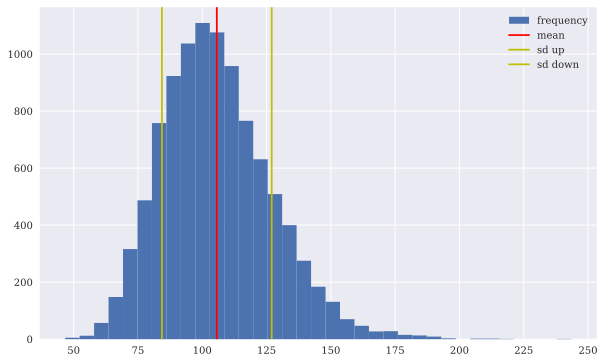

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(ST, bins=35, label='frequency');
plt.axvline(ST.mean(), color='r', label='mean')
plt.axvline(ST.mean() + ST.std(), color='y', label='sd up')
plt.axvline(ST.mean() - ST.std(), color='y', label='sd down')
plt.legend(loc=0);

In [70]:
K = 105

In [71]:
CT = np.maximum(ST - K, 0)

In [72]:
CT[:8].round(1)

array([ 0. ,  4.2, 15.5,  9.9,  0. , 22.7, 13.6, 13.6])

In [73]:
C0 = math.exp(-r * T) * CT.mean()

In [74]:
C0

8.288763195530931

## Completeness of Black-Scholes-Merton

In [75]:
B0 = 100

In [76]:
M0 = np.array((B0, S0))

In [77]:
BT = B0 * np.ones(len(ST)) * math.exp(r * T)

In [78]:
BT[:4]

array([105.12711, 105.12711, 105.12711, 105.12711])

In [79]:
M = np.array((BT, ST)).T

In [80]:
M

array([[105.12711,  81.74955],
       [105.12711, 109.19348],
       [105.12711, 120.4628 ],
       ...,
       [105.12711,  71.10624],
       [105.12711, 105.32038],
       [105.12711, 134.77647]])

In [81]:
phi = np.linalg.lstsq(M, CT, rcond=None)[0]

In [82]:
phi

array([-0.51089,  0.59075])

In [83]:
np.mean((np.dot(M, phi) - CT))

1.1798206855928583e-14

In [84]:
np.dot(M0, phi)

7.9850808951857335

## Merton Jump-Diffusion Option Pricing

In [85]:
M0 = np.array((100, 100)) 

In [86]:
r = 0.05
sigma = 0.2
lmbda = 0.3
mu = -0.3
delta = 0.1
rj = lmbda * (math.exp(mu + delta ** 2 / 2) - 1)
T = 1.0
I = 10000

In [87]:
BT = M0[0] * np.ones(I) * math.exp(r * T)

In [88]:
z = rng.standard_normal((2, I))
z -= z.mean()
z /= z.std()
y = rng.poisson(lmbda, I)

In [89]:
ST = S0 * (
    np.exp((r - rj - sigma ** 2 / 2) * T +
           sigma * math.sqrt(T) * z[0]) + 
    (np.exp(mu + delta * z[1]) - 1) * y
)

In [90]:
ST.mean() * math.exp(-r * T)

100.53765025420363

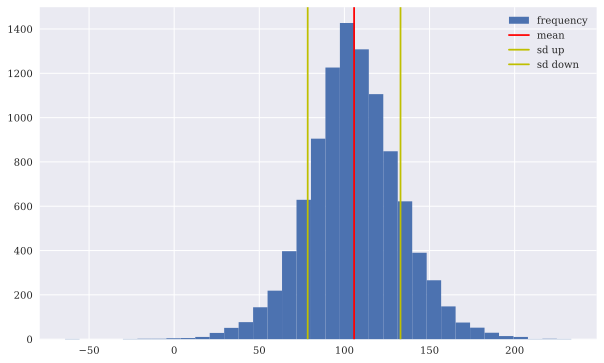

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(ST, bins=35, label='frequency');
plt.axvline(ST.mean(), color='r', label='mean')
plt.axvline(ST.mean() + ST.std(), color='y', label='sd up')
plt.axvline(ST.mean() - ST.std(), color='y', label='sd down')
plt.legend(loc=0);

In [92]:
ST = np.maximum(S0 * (
    np.exp((r - rj - sigma ** 2 / 2) * T +
           sigma * math.sqrt(T) * z[0]) + 
    (np.exp(mu + delta * z[1]) - 1) * y
), 0)

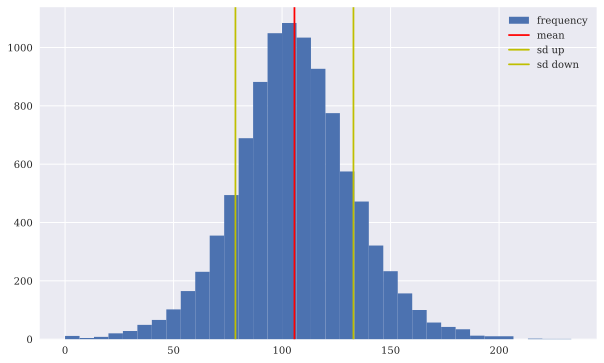

In [93]:
plt.figure(figsize=(10, 6))
plt.hist(ST, bins=35, label='frequency')
plt.axvline(ST.mean(), color='r', label='mean')
plt.axvline(ST.mean() + ST.std(), color='y', label='sd up')
plt.axvline(ST.mean() - ST.std(), color='y', label='sd down')
plt.legend(loc=0);

In [94]:
K = 105

In [95]:
CT = np.maximum(ST - K, 0)

In [96]:
C0 = math.exp(-r * T)  * np.mean(CT)

In [97]:
C0

10.306374338651601

In [98]:
M = np.array((BT, ST)).T

In [99]:
phi = np.linalg.lstsq(M, CT, rcond=-1)[0]

In [100]:
phi

array([-0.41827,  0.51847])

In [101]:
np.mean(np.dot(M, phi) - CT)

1.1823431123048067e-15

In [102]:
np.dot(M0, phi)

10.020157308565008

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>